In [16]:
import os

# Set your actual path here
folder_path = r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed"

# List all files in the folder
for filename in os.listdir(folder_path):
    print(filename)


content_clean.csv
ratings_clean.csv
users_clean.csv
view_history_clean.csv


In [17]:
import pandas as pd

# Use raw strings to handle backslashes in Windows paths
content_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\content_clean.csv")
ratings_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\ratings_clean.csv", parse_dates=["rating_date"])
users_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\users_clean.csv", parse_dates=["signup_date"])
view_history_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\view_history_clean.csv", parse_dates=["watch_date"])


C:\Users\Ashley's PC\AppData\Local\Temp\ipykernel_24860\2503130888.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_content, x="title", y="watch_duration_min", palette="rocket")
C:\Users\Ashley's PC\AppData\Local\Temp\ipykernel_24860\2503130888.py:21: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


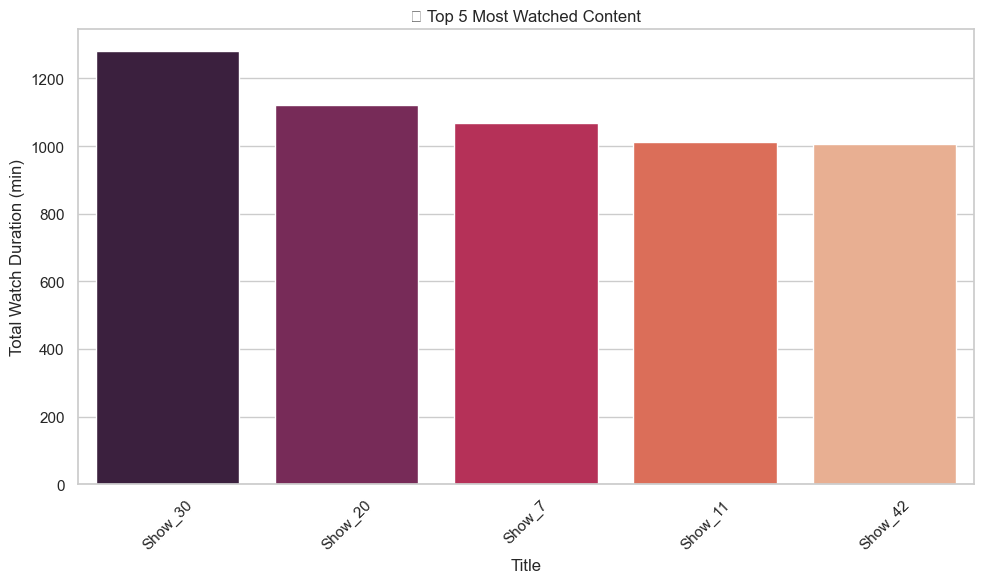

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total watch time per content
top_content = (
    view_history_df
    .groupby("content_id")["watch_duration_min"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .merge(content_df, on="content_id")
)

# Plot
sns.barplot(data=top_content, x="title", y="watch_duration_min", palette="rocket")
plt.title("🔥 Top 5 Most Watched Content")
plt.ylabel("Total Watch Duration (min)")
plt.xlabel("Title")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

output_readme_path = os.path.join(output_dir, "top10_most_watched.png")
plt.savefig(output_readme_path, bbox_inches="tight", dpi=150)
print(f"Plot saved to {output_readme_path}")

Plot saved to 1. data/outputs\top10_most_watched.png


<Figure size 1000x600 with 0 Axes>

In [ ]:
#  Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Settings
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_palette("Set2")


In [22]:
import pandas as pd

# Use raw strings to handle backslashes in Windows paths
content_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\content_clean.csv")
ratings_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\ratings_clean.csv", parse_dates=["rating_date"])
users_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\users_clean.csv", parse_dates=["signup_date"])
view_history_df = pd.read_csv(r"C:\Users\AshleyPC\Netflix_Analytics_Project\1. data\processed\view_history_clean.csv", parse_dates=["watch_date"])


In [ ]:
#  Dataset Shapes
print("Content shape:", content_df.shape)
print("Ratings shape:", ratings_df.shape)
print("Users shape:", users_df.shape)
print("View History shape:", view_history_df.shape)

#  Peek at datasets
display(content_df.head())
display(ratings_df.head())
display(users_df.head())
display(view_history_df.head())


Content shape: (50, 5)
Ratings shape: (200, 5)
Users shape: (100, 4)
View History shape: (500, 5)


,content_id,title,genre,release_year,duration_min
0,1,Show_1,Romance,2019,87
1,2,Show_2,Romance,2012,92
2,3,Show_3,Romance,2017,91
3,4,Show_4,Romance,2023,51
4,5,Show_5,Thriller,2017,87


,rating_id,user_id,content_id,rating,rating_date
0,1,22,39,5,2024-04-13
1,2,74,9,1,2024-03-11
2,3,14,8,1,2024-04-05
3,4,2,44,5,2024-04-03
4,5,71,12,3,2024-02-25


,user_id,region,signup_date,subscription_type
0,1,IN,2023-01-28,Standard
1,2,BR,2023-05-15,Premium
2,3,CA,2023-07-20,Basic
3,4,BR,2023-11-24,Basic
4,5,BR,2023-09-25,Basic


,log_id,user_id,content_id,watch_date,watch_duration_min
0,1,9,20,2024-01-22,73
1,2,72,28,2024-04-28,97
2,3,19,38,2024-03-16,71
3,4,19,5,2024-01-16,30
4,5,73,20,2024-04-10,55


Index(['content_id', 'title', 'genre', 'release_year', 'duration_min'], dtype='object')


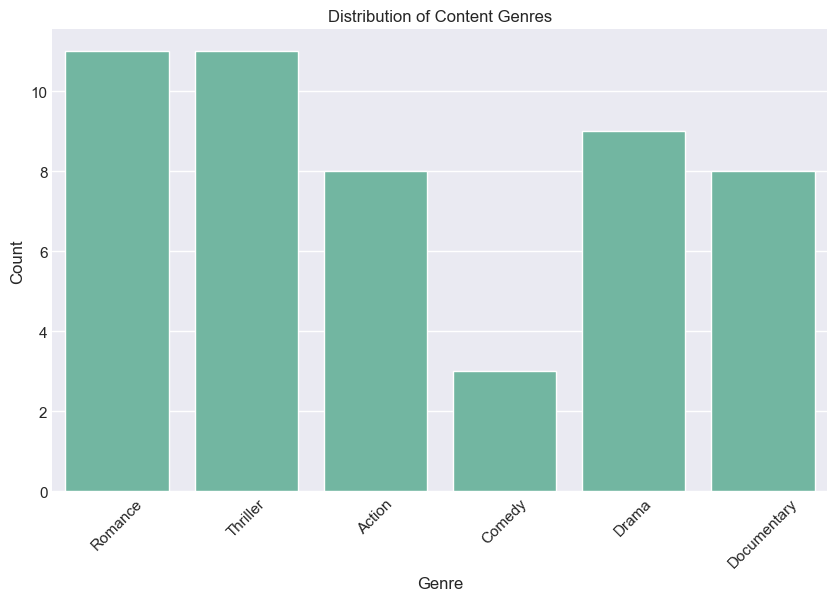

In [ ]:



print(content_df.columns)
sns.countplot(data=content_df, x="genre")
plt.title("Distribution of Content Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:

readme_plot_path = os.path.join(output_dir, "latest_plot.png")
plt.savefig(readme_plot_path, bbox_inches="tight", dpi=150)
print(f"Plot saved to {readme_plot_path}")

Plot saved to 1. data/outputs\latest_plot.png


<Figure size 1000x600 with 0 Axes>

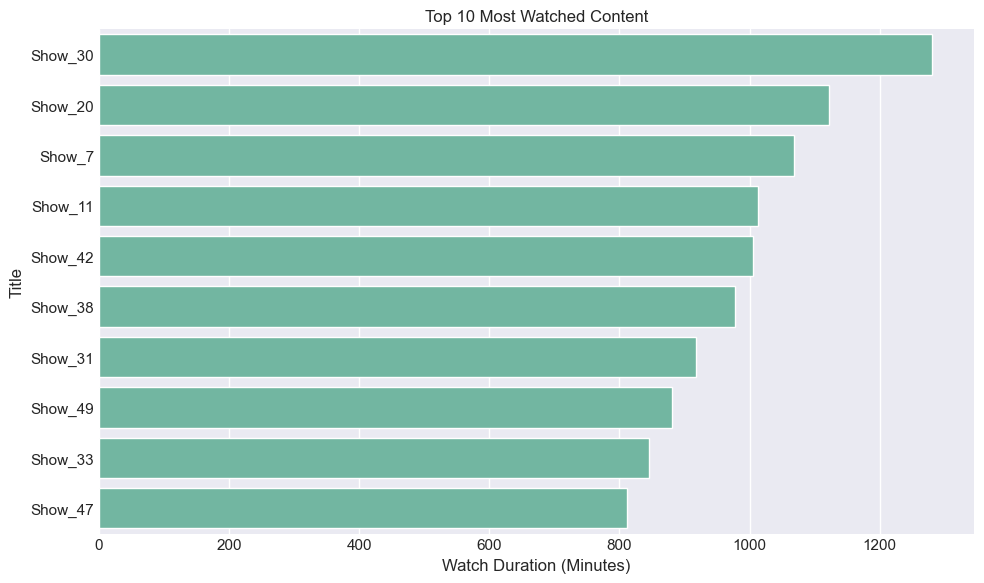

In [ ]:
#  Most Watched Content
top_content = (
    view_history_df
    .groupby("content_id")["watch_duration_min"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .merge(content_df, on="content_id")
)

sns.barplot(data=top_content, y="title", x="watch_duration_min")
plt.title("Top 10 Most Watched Content")
plt.xlabel("Watch Duration (Minutes)")
plt.ylabel("Title")
plt.tight_layout()
plt.show()


C:\Users\Ashley's PC\AppData\Local\Temp\ipykernel_24860\2324908434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_avg_ratings, x="avg_rating", y="title", palette="viridis")


Plot saved to 1. data/outputs\top10_avg_ratings.png


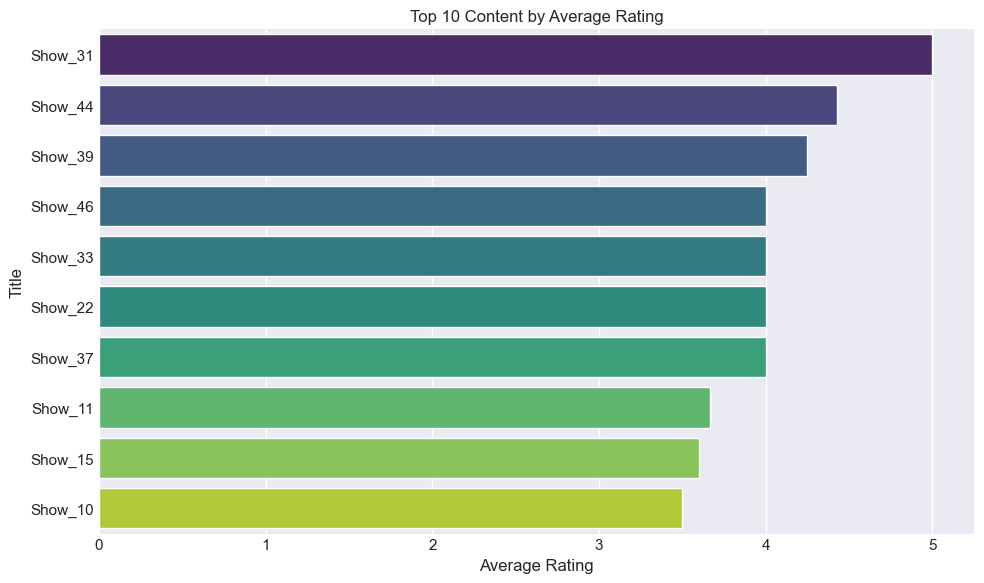

In [53]:
# Merge avg_ratings with content_df to get titles
avg_ratings_with_titles = avg_ratings.merge(content_df[["content_id", "title"]], on="content_id")

# Sort by avg_rating and select top 10
top10_avg_ratings = avg_ratings_with_titles.sort_values("avg_rating", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_avg_ratings, x="avg_rating", y="title", palette="viridis")
plt.title("Top 10 Content by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Title")
plt.tight_layout()

# Save for GitHub README
readme_avg_rating_path = os.path.join(output_dir, "top10_avg_ratings.png")
plt.savefig(readme_avg_rating_path, bbox_inches="tight", dpi=150)
print(f"Plot saved to {readme_avg_rating_path}")
plt.show()

In [ ]:
# Save the top 10 average ratings plot as PNG for GitHub README
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_avg_ratings, x="avg_rating", y="title", palette="viridis")
plt.title("Top 10 Content by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Title")
plt.tight_layout()

plt.savefig(readme_avg_rating_path, bbox_inches="tight", dpi=150)
print(f"Plot saved to {readme_avg_rating_path}")
plt.show()

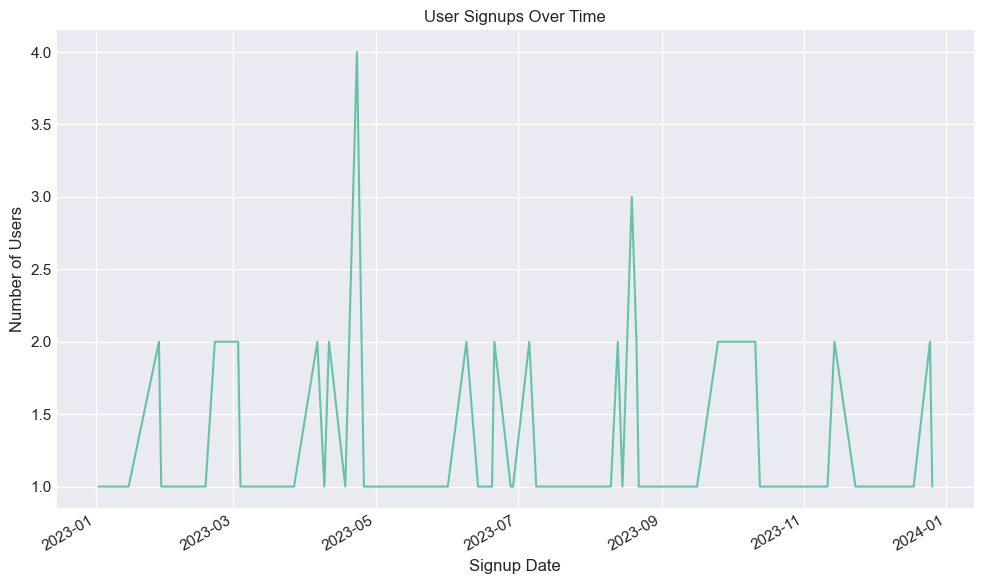

In [ ]:
#  Signups Over Time
signup_trend = users_df.groupby("signup_date").size()

signup_trend.plot()
plt.title("User Signups Over Time")
plt.xlabel("Signup Date")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


In [55]:
plt.savefig(readme_avg_rating_path, bbox_inches="tight", dpi=150)
print(f"Plot saved to {readme_avg_rating_path}")

Plot saved to 1. data/outputs\top10_avg_ratings.png


<Figure size 1000x600 with 0 Axes>

In [42]:


print(users_df.columns)
display(users_df.head())

Index(['user_id', 'region', 'signup_date', 'subscription_type'], dtype='object')


,user_id,region,signup_date,subscription_type
0,1,IN,2023-01-28,Standard
1,2,BR,2023-05-15,Premium
2,3,CA,2023-07-20,Basic
3,4,BR,2023-11-24,Basic
4,5,BR,2023-09-25,Basic


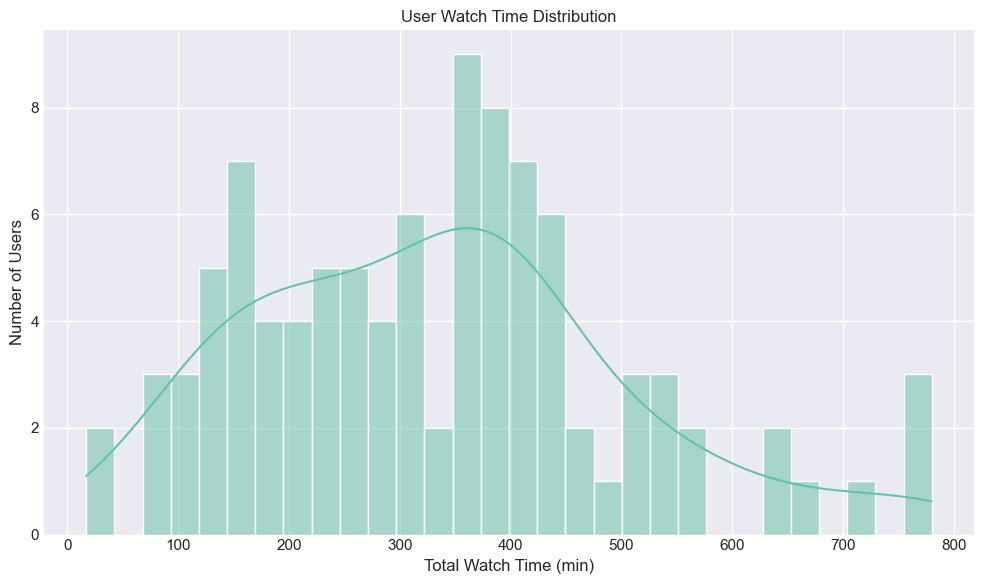

In [ ]:
#  Total Watch Time per User
user_watch = (
    view_history_df
    .groupby("user_id")["watch_duration_min"]
    .sum()
    .reset_index()
)

sns.histplot(user_watch["watch_duration_min"], bins=30, kde=True)
plt.title("User Watch Time Distribution")
plt.xlabel("Total Watch Time (min)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


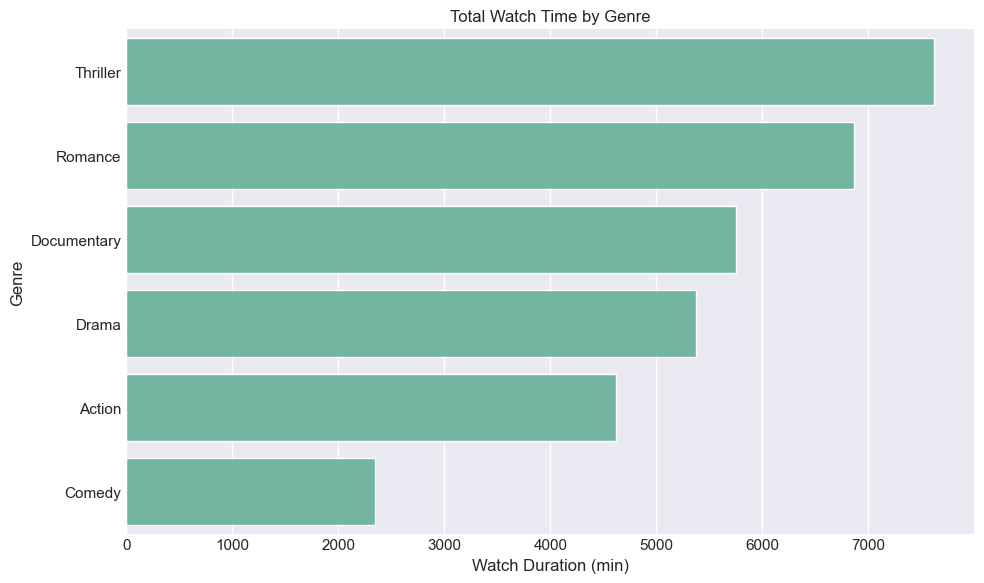

In [ ]:
#  Merge View History with Content to Get Genres
view_genre = view_history_df.merge(content_df, on="content_id")

#  Total Watch Time by Genre
genre_watch = (
    view_genre
    .groupby("genre")["watch_duration_min"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(x="watch_duration_min", y="genre", data=genre_watch)
plt.title("Total Watch Time by Genre")
plt.xlabel("Watch Duration (min)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


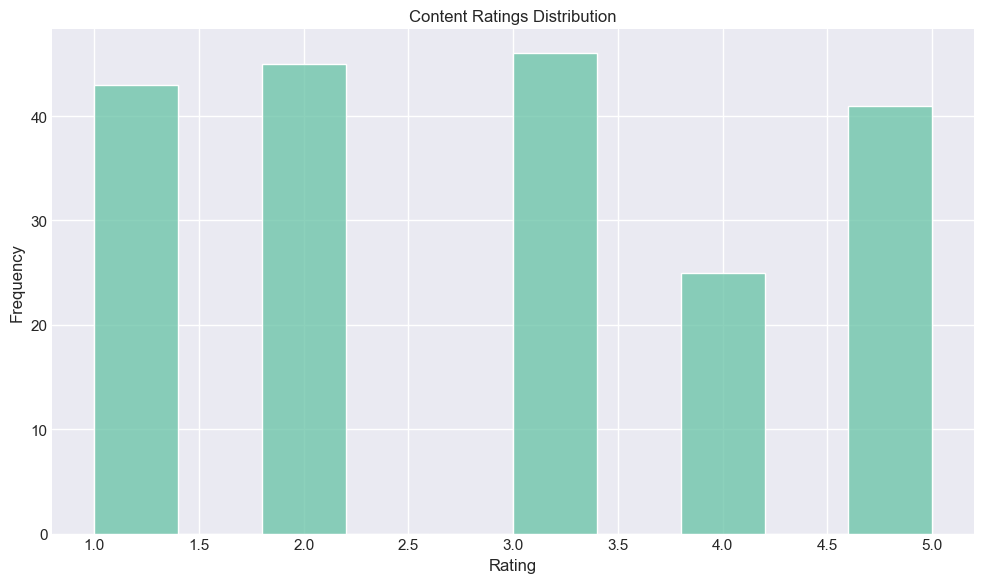

In [ ]:
#  Distribution of Ratings
sns.histplot(ratings_df["rating"], bins=10, kde=False)
plt.title("Content Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# Count of Ratings per Content
rating_counts = ratings_df.groupby("content_id")["rating"].count().reset_index(name="num_ratings")

#  Average Ratings
avg_ratings = ratings_df.groupby("content_id")["rating"].mean().reset_index(name="avg_rating")

# 🪄 Merge and Filter (at least 10 ratings)
top_rated = (
    avg_ratings
    .merge(rating_counts, on="content_id")
    .merge(content_df, on="content_id")
    .query("num_ratings >= 10")
    .sort_values("avg_rating", ascending=False)
    .head(10)
)

print("Top 10 Highest-Rated Content (≥10 ratings):")
print(top_rated[["title", "avg_rating", "num_ratings"]])


🏅 Top 10 Highest-Rated Content (≥10 ratings):
Empty DataFrame
Columns: [title, avg_rating, num_ratings]
Index: []


In [47]:
import os

output_dir = "1. data/outputs"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "genre_watchtime.png"))

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 🔢 Merge View History with Content to Get Genres
view_genre = view_history_df.merge(content_df, on="content_id")

# 📊 Total Watch Time by Genre
genre_watch = (
    view_genre
    .groupby("genre")["watch_duration_min"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(x="watch_duration_min", y="genre", data=genre_watch)
plt.title("Total Watch Time by Genre")
plt.xlabel("Watch Duration (min)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
plt.savefig("1. data/outputs/genre_watchtime.png")

In [48]:
import os

file_path = os.path.join(output_dir, "genre_watchtime.png")
print("File exists:", os.path.exists(file_path))

File exists: True
